In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
os.getcwd()

'/content'

In [4]:
df = pd.read_csv('/content/drive/MyDrive/credit/creditcard.csv')

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [8]:
df['Time'].value_counts()

163152.0    36
64947.0     26
68780.0     25
3767.0      21
3770.0      20
            ..
127750.0     1
62260.0      1
62259.0      1
127753.0     1
172792.0     1
Name: Time, Length: 124592, dtype: int64

In [9]:
# sns.pairplot(df, hue='Class', )

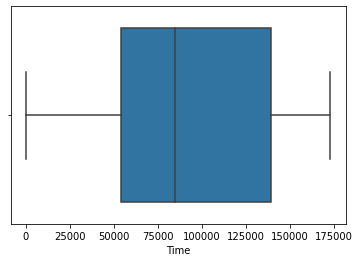

In [12]:
sns.boxplot(data=df, x='Time')

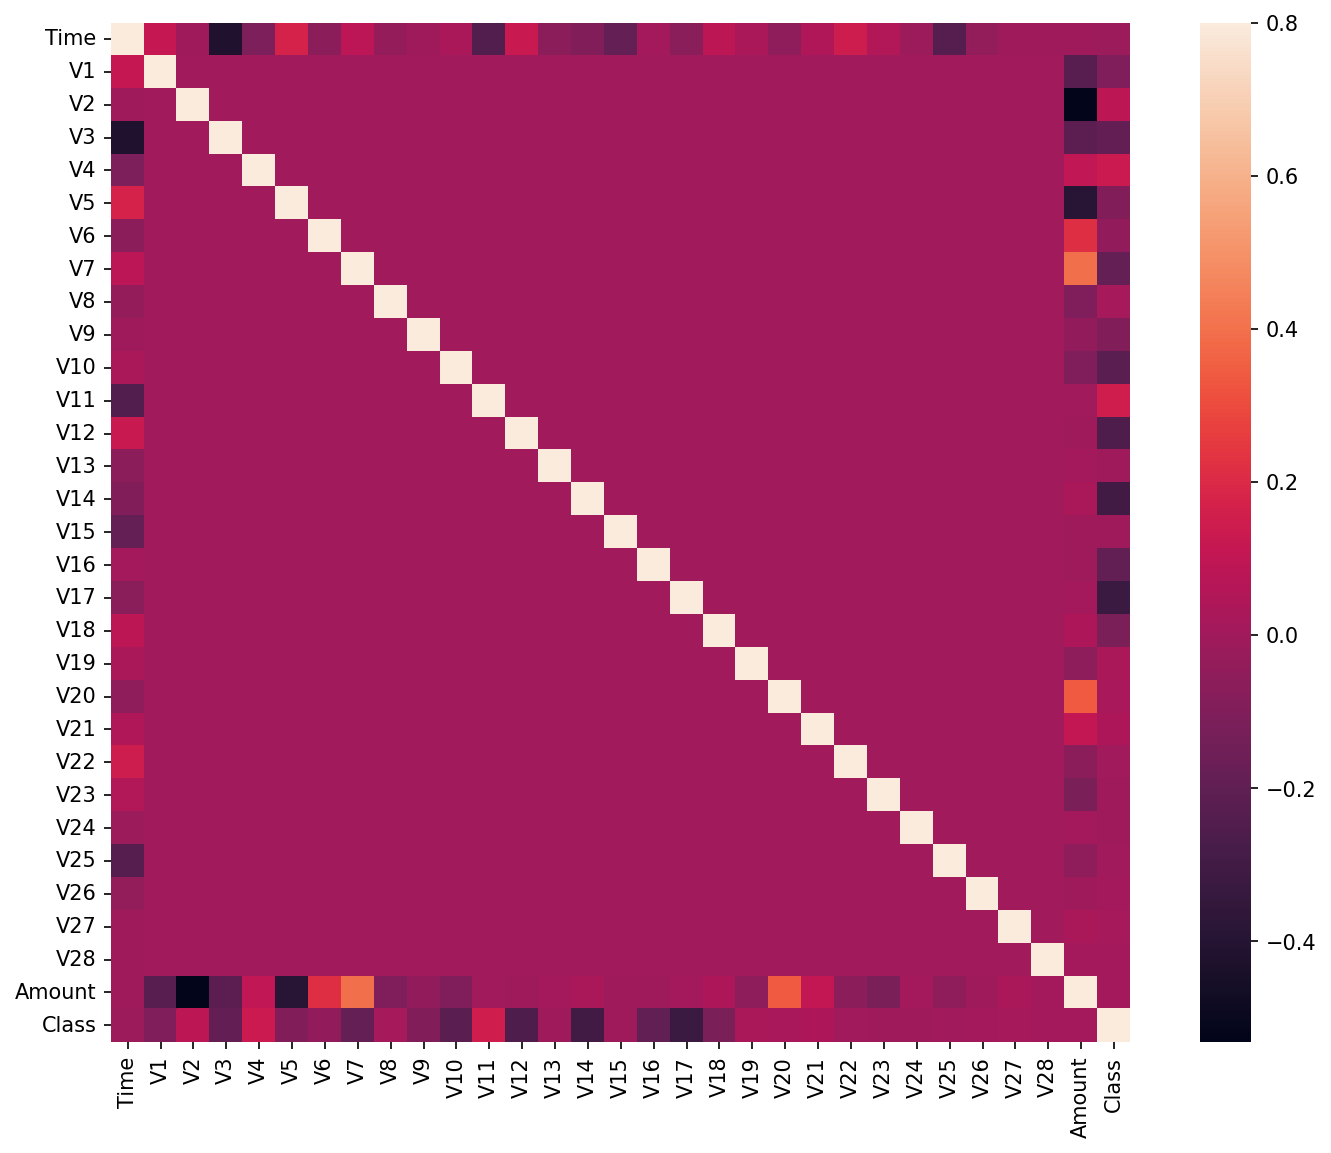

In [17]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9), dpi=150)
sns.heatmap(corrmat, vmax=.8, square=True);

In [18]:
df.corr()['Class']

Time     -0.012323
V1       -0.101347
V2        0.091289
V3       -0.192961
V4        0.133447
V5       -0.094974
V6       -0.043643
V7       -0.187257
V8        0.019875
V9       -0.097733
V10      -0.216883
V11       0.154876
V12      -0.260593
V13      -0.004570
V14      -0.302544
V15      -0.004223
V16      -0.196539
V17      -0.326481
V18      -0.111485
V19       0.034783
V20       0.020090
V21       0.040413
V22       0.000805
V23      -0.002685
V24      -0.007221
V25       0.003308
V26       0.004455
V27       0.017580
V28       0.009536
Amount    0.005632
Class     1.000000
Name: Class, dtype: float64

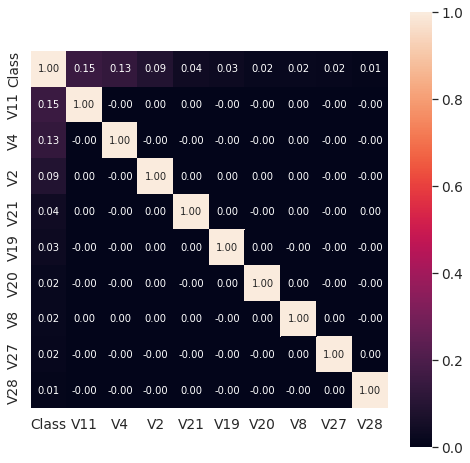

In [20]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Class')['Class'].index
cm = np.corrcoef(df[cols].values.T)
plt.figure(figsize=(8, 8))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [21]:
df = df.drop('Time', axis=1)

In [22]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,1.772925e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


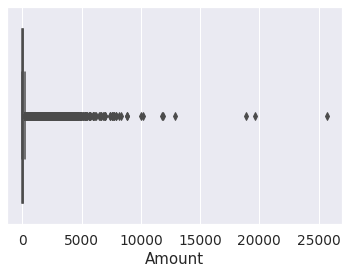

In [23]:
sns.boxplot(data=df, x='Amount')

In [25]:
df.skew()

V1        -3.280667
V2        -4.624866
V3        -2.240155
V4         0.676292
V5        -2.425901
V6         1.826581
V7         2.553907
V8        -8.521944
V9         0.554680
V10        1.187141
V11        0.356506
V12       -2.278401
V13        0.065233
V14       -1.995176
V15       -0.308423
V16       -1.100966
V17       -3.844914
V18       -0.259880
V19        0.109192
V20       -2.037155
V21        3.592991
V22       -0.213258
V23       -5.875140
V24       -0.552499
V25       -0.415793
V26        0.576693
V27       -1.170209
V28       11.192091
Amount    16.977724
Class     23.997579
dtype: float64

In [27]:
def outlier_cap(x):
    x=x.clip(lower=x.quantile(0.05))
    x=x.clip(upper=x.quantile(0.95))
    return(x)

In [28]:
df['V8'] = outlier_cap(df['V8'])
df['V23'] = outlier_cap(df['V23'])
df['V28'] = outlier_cap(df['V28'])
df['Amount'] = outlier_cap(df['Amount'])

In [29]:
df.skew()

V1        -3.280667
V2        -4.624866
V3        -2.240155
V4         0.676292
V5        -2.425901
V6         1.826581
V7         2.553907
V8         0.273459
V9         0.554680
V10        1.187141
V11        0.356506
V12       -2.278401
V13        0.065233
V14       -1.995176
V15       -0.308423
V16       -1.100966
V17       -3.844914
V18       -0.259880
V19        0.109192
V20       -2.037155
V21        3.592991
V22       -0.213258
V23        0.094405
V24       -0.552499
V25       -0.415793
V26        0.576693
V27       -1.170209
V28       -0.438681
Amount     2.018814
Class     23.997579
dtype: float64

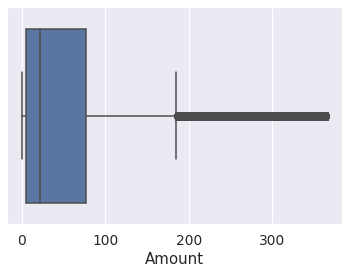

In [30]:
sns.boxplot(data=df, x='Amount')

In [31]:
from sklearn.feature_selection import VarianceThreshold
var_selector = VarianceThreshold(threshold=0)
var_selector.fit_transform(df.drop('Class', axis=1))
cols = var_selector.get_support(indices=True)
num = df.iloc[:, cols]

In [32]:
num.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.488016,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,365.00
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [36]:
num.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,0.072726,-3.147640e-15,1.772925e-15,...,5.126845e-16,1.473120e-16,8.042109e-16,-0.004052,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,0.006393,65.169812
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,0.461083,1.098632e+00,1.088850e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,0.243284,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,0.131415,96.373372
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-0.842147,-1.343407e+01,-2.458826e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-0.472246,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-0.317843,0.920000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-0.208630,-6.430976e-01,-5.354257e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-0.161846,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-0.052960,5.600000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,0.022358,-5.142873e-02,-9.291738e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-0.011193,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,0.011244,22.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,0.327346,5.971390e-01,4.539234e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,0.147642,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,0.078280,77.165000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,1.049984,1.559499e+01,2.374514e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,0.488016,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,0.256090,365.000000


In [37]:
from sklearn.preprocessing import KBinsDiscretizer
kbin = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
num_binned = pd.DataFrame(kbin.fit_transform(num), index=num.index, columns=num.columns,).add_suffix('_rank')
num_binned.head()

,V1_rank,V2_rank,V3_rank,V4_rank,V5_rank,V6_rank,V7_rank,V8_rank,V9_rank,V10_rank,...,V20_rank,V21_rank,V22_rank,V23_rank,V24_rank,V25_rank,V26_rank,V27_rank,V28_rank,Amount_rank
0,1.0,4.0,9.0,8.0,3.0,7.0,6.0,5.0,6.0,6.0,...,8.0,5.0,6.0,3.0,5.0,5.0,3.0,7.0,3.0,8.0
1,6.0,5.0,4.0,6.0,5.0,5.0,4.0,5.0,4.0,4.0,...,4.0,2.0,2.0,6.0,2.0,6.0,6.0,4.0,5.0,1.0
2,1.0,1.0,9.0,6.0,3.0,9.0,8.0,7.0,0.0,6.0,...,9.0,8.0,8.0,9.0,1.0,2.0,4.0,2.0,2.0,9.0
3,2.0,3.0,9.0,2.0,5.0,8.0,6.0,7.0,0.0,5.0,...,2.0,3.0,4.0,2.0,0.0,9.0,3.0,6.0,7.0,8.0
4,1.0,7.0,8.0,6.0,3.0,6.0,7.0,1.0,8.0,8.0,...,8.0,5.0,8.0,2.0,5.0,3.0,8.0,8.0,9.0,7.0


In [38]:
num_combined = pd.concat([num, df['Class']], axis=1, join='inner')

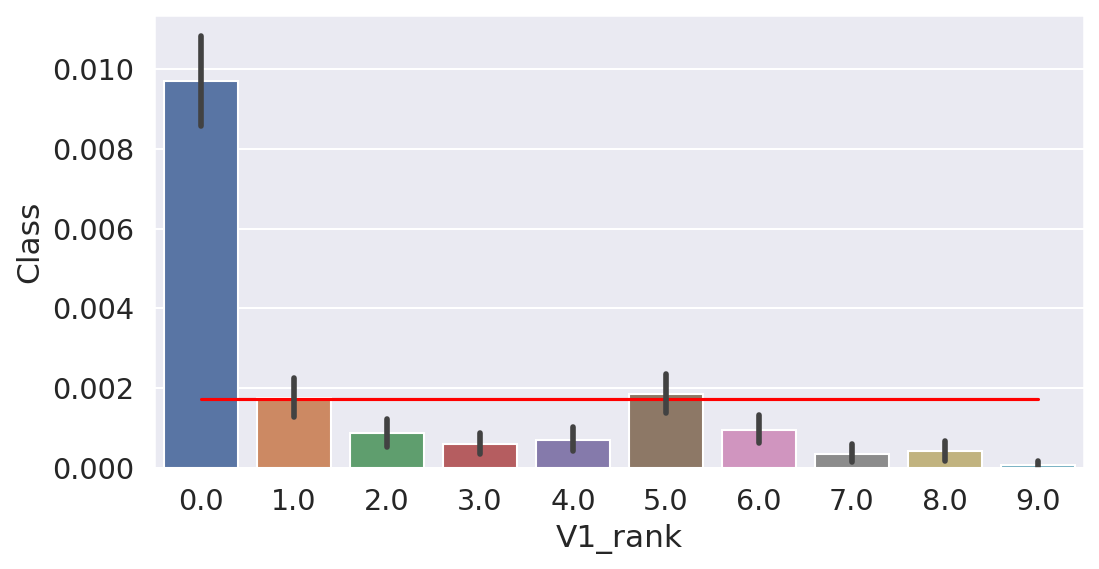

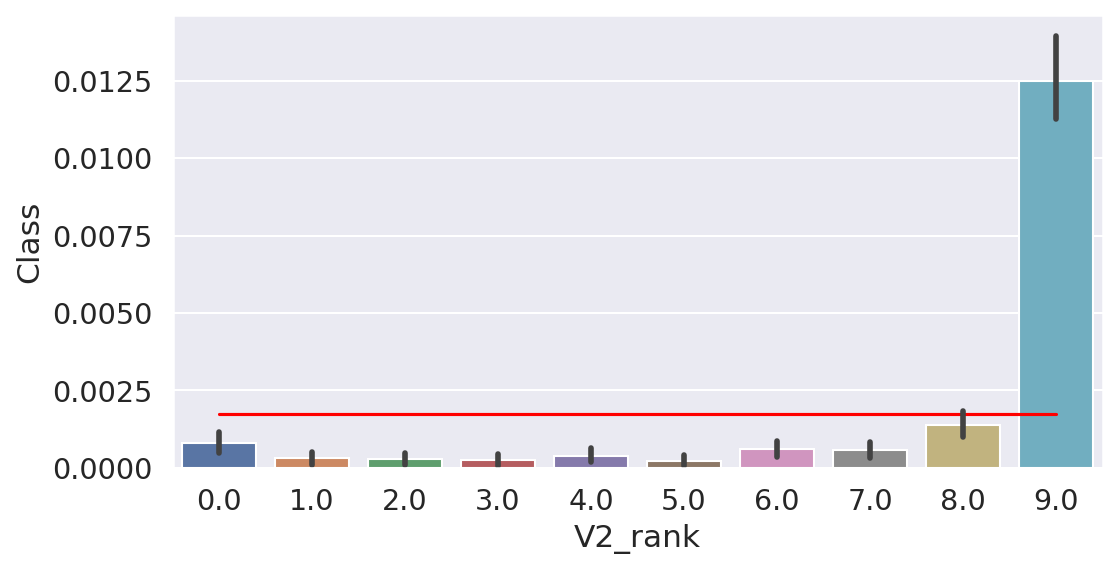

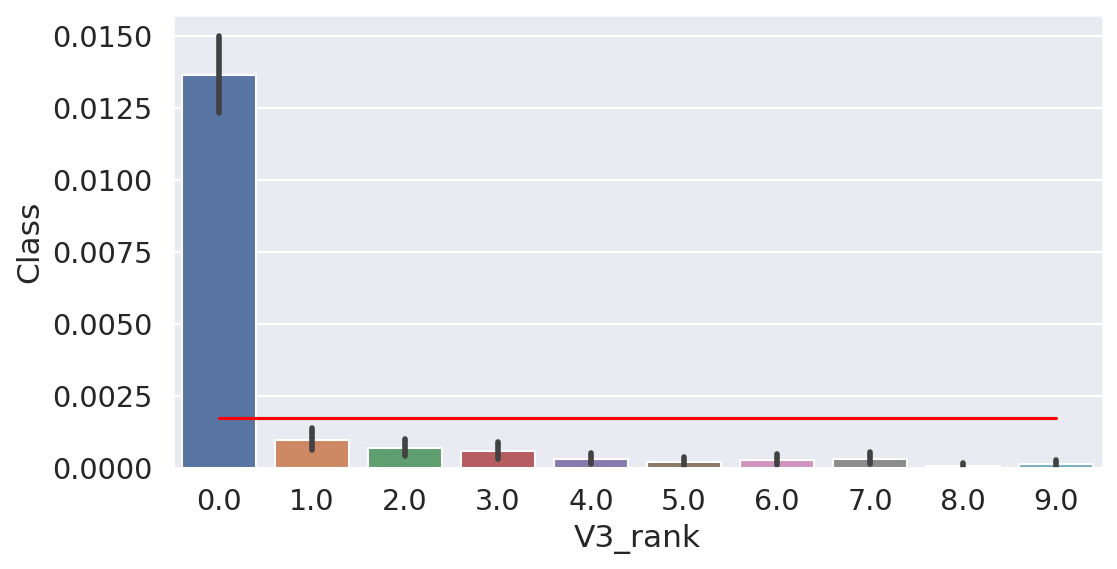

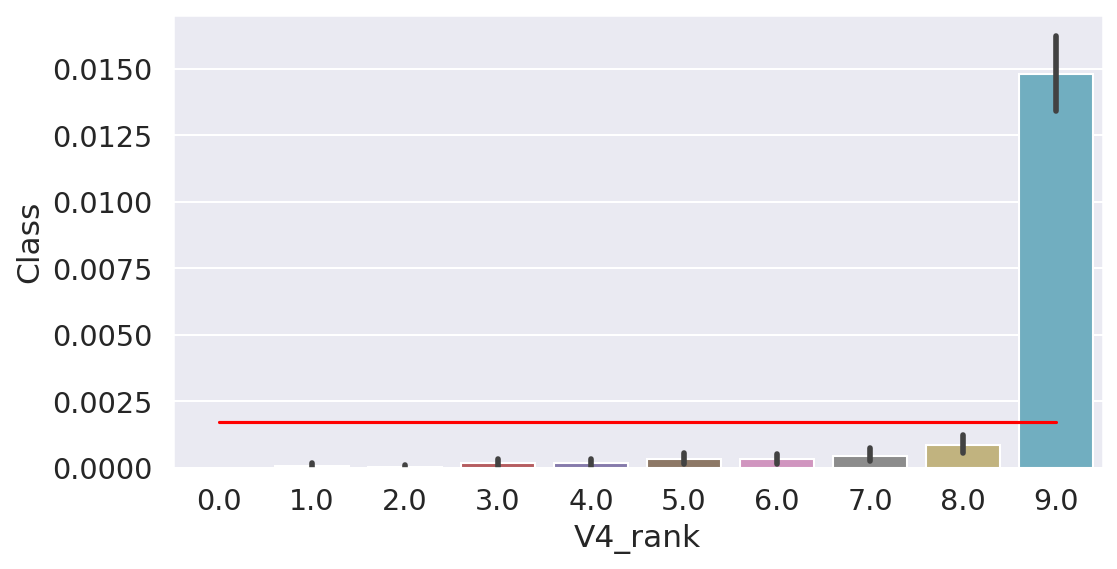

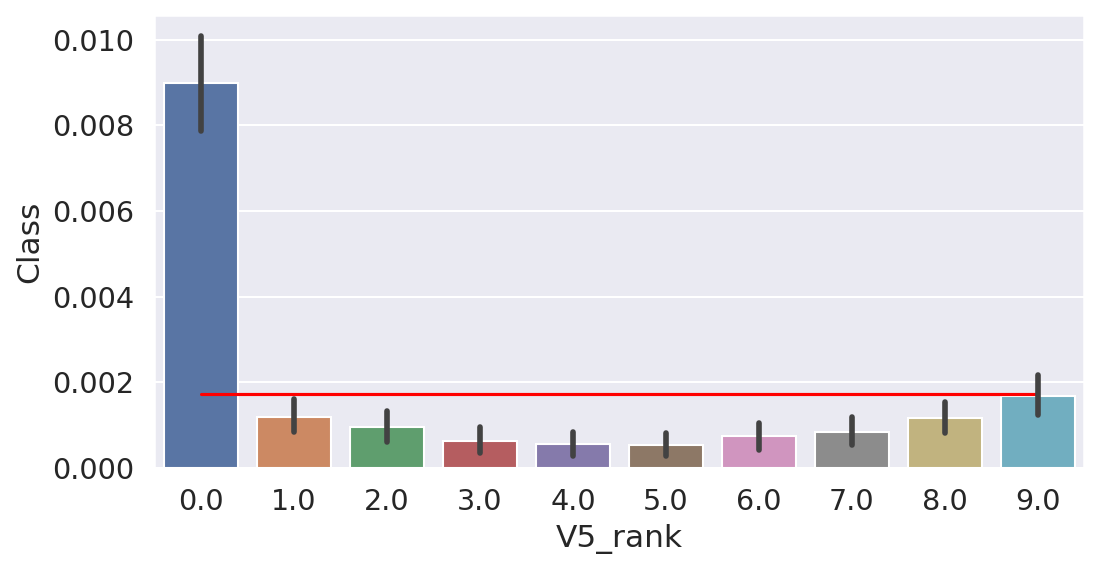

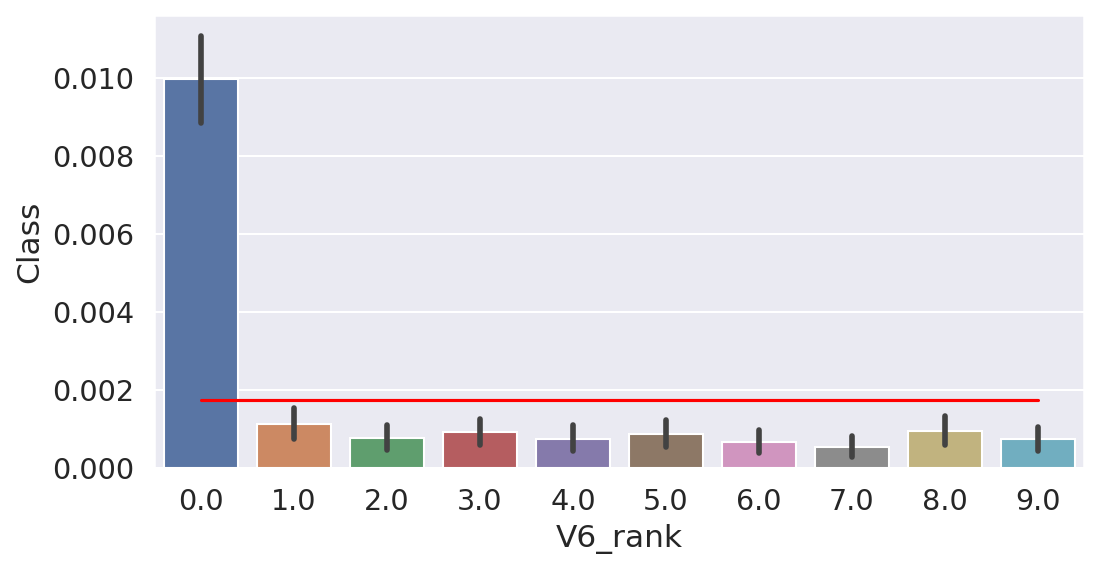

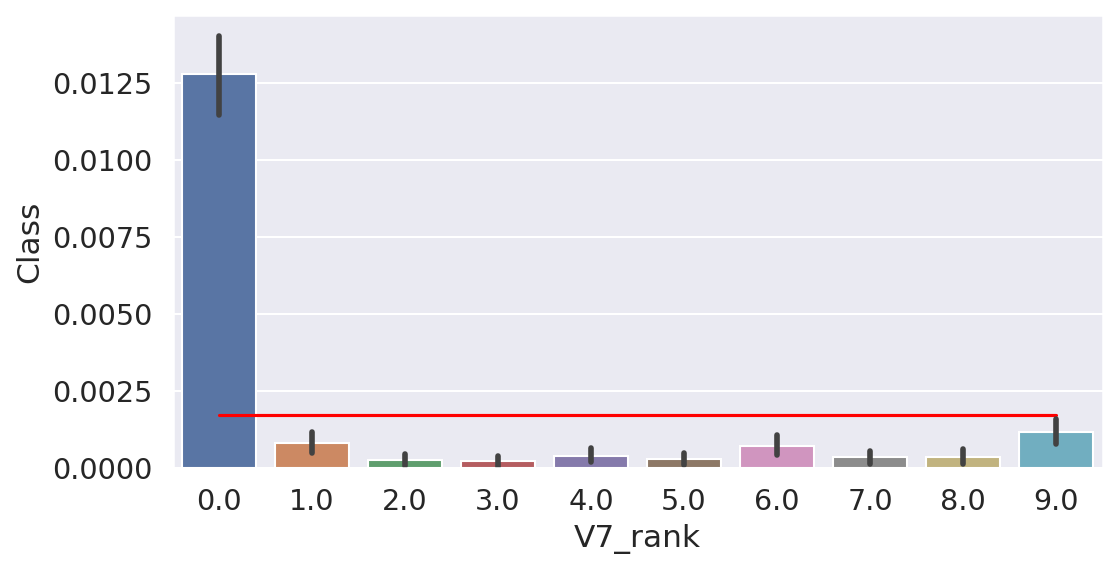

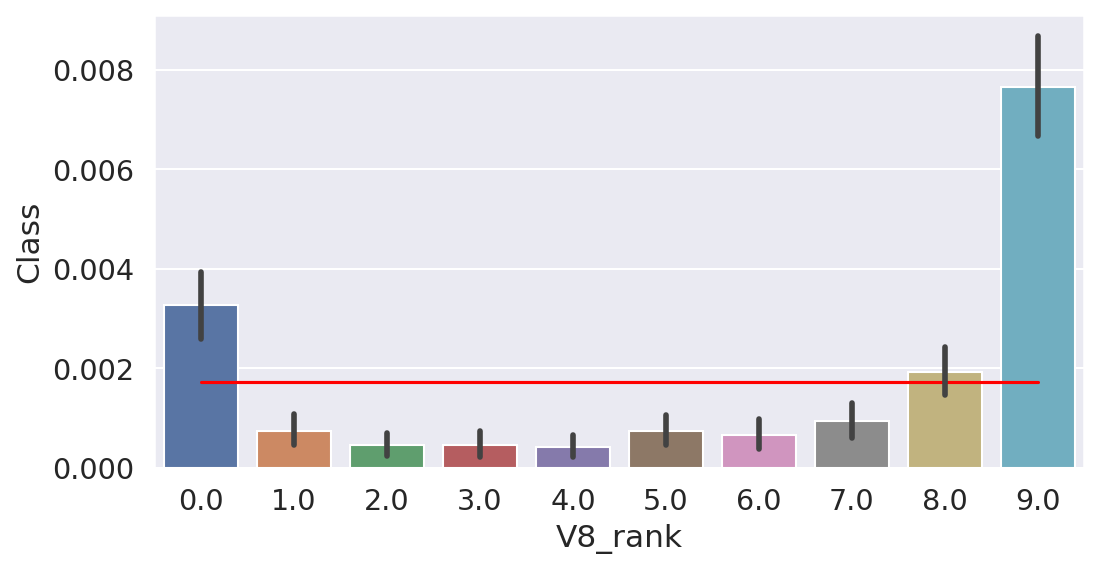

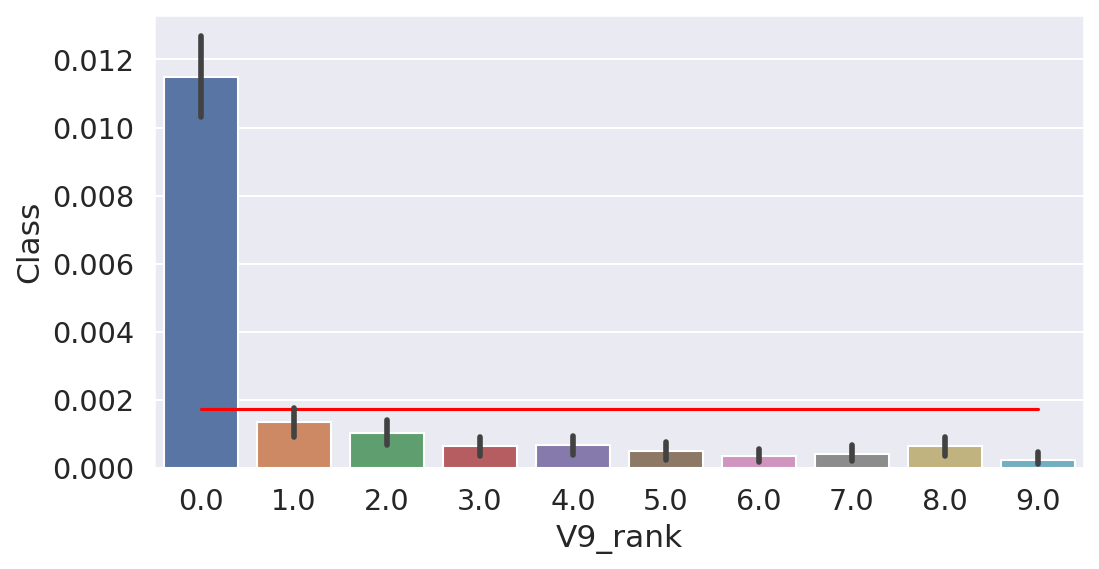

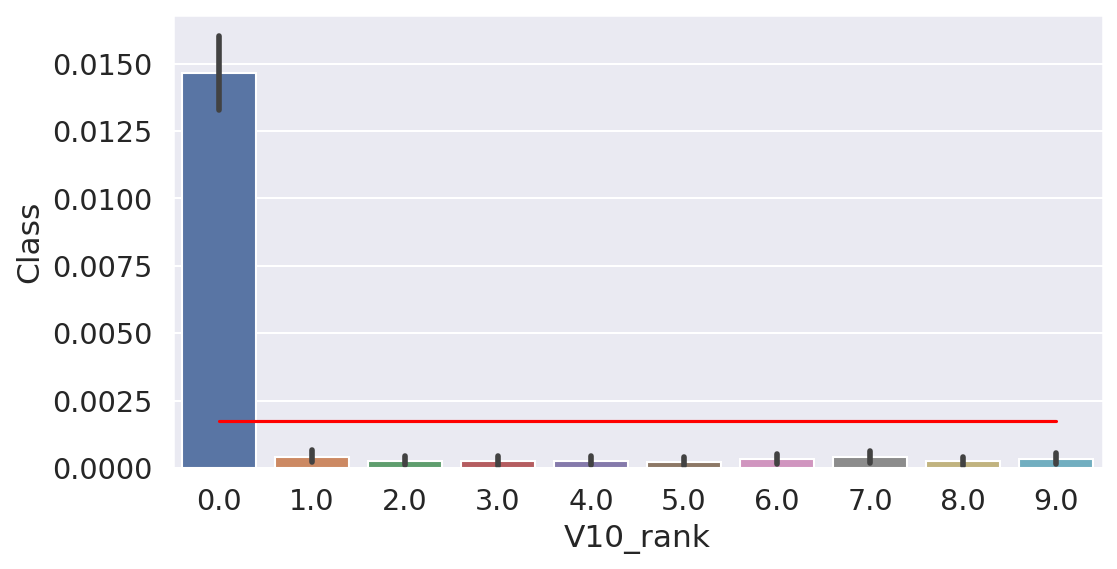

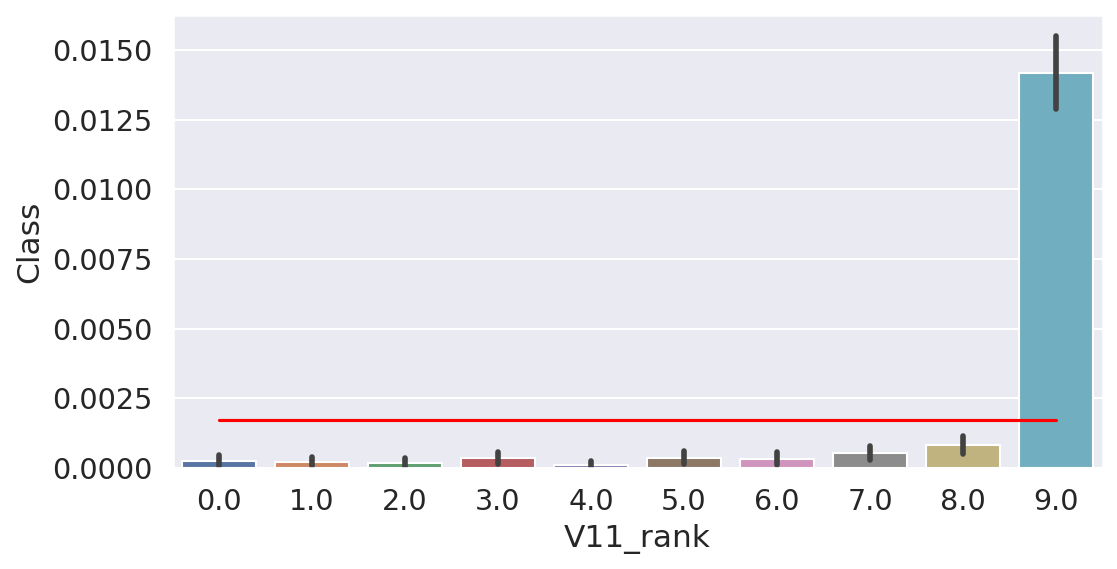

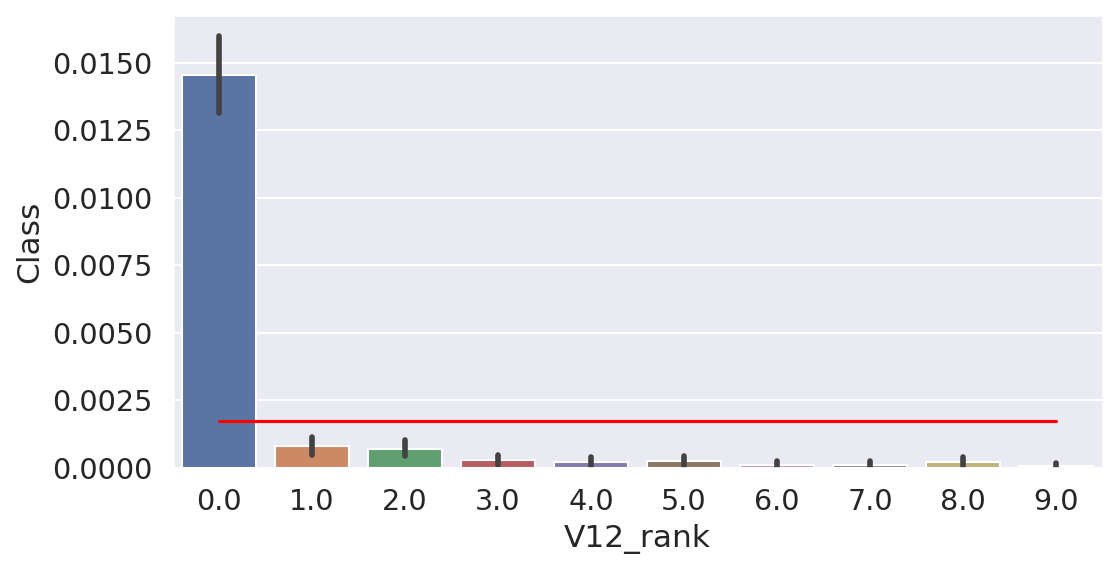

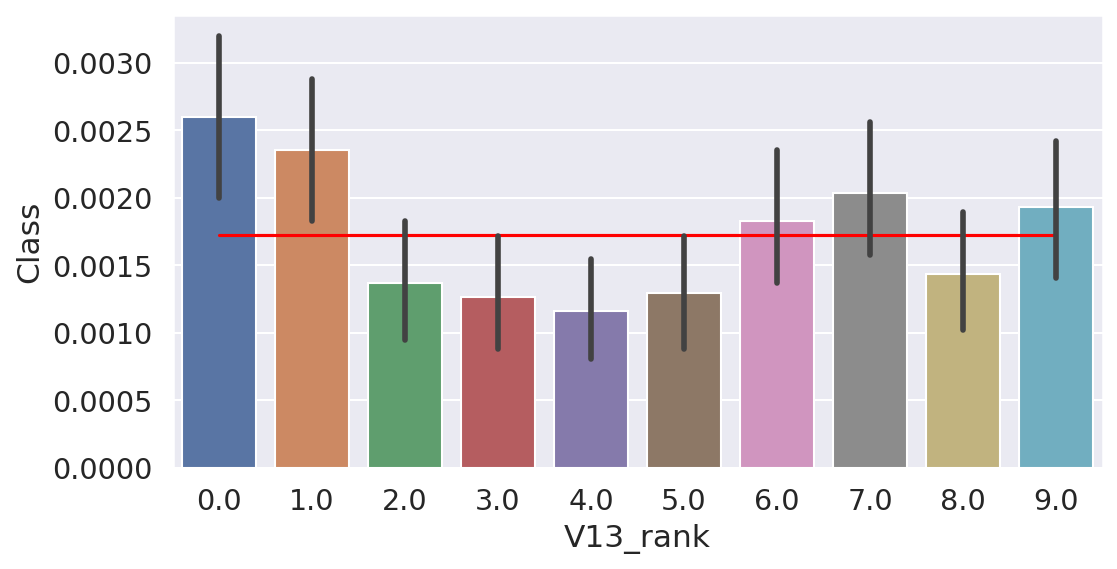

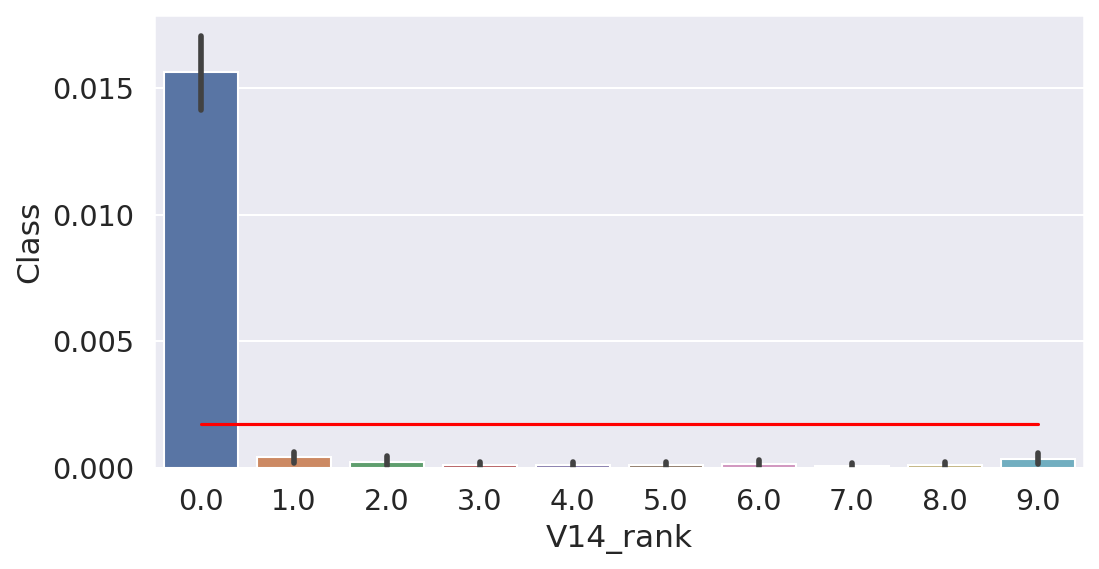

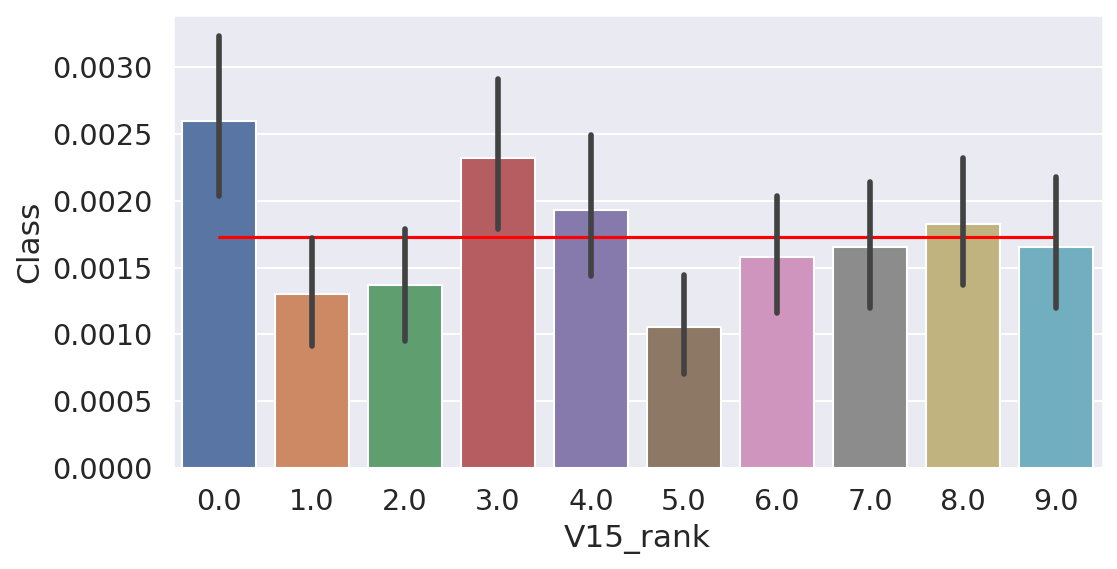

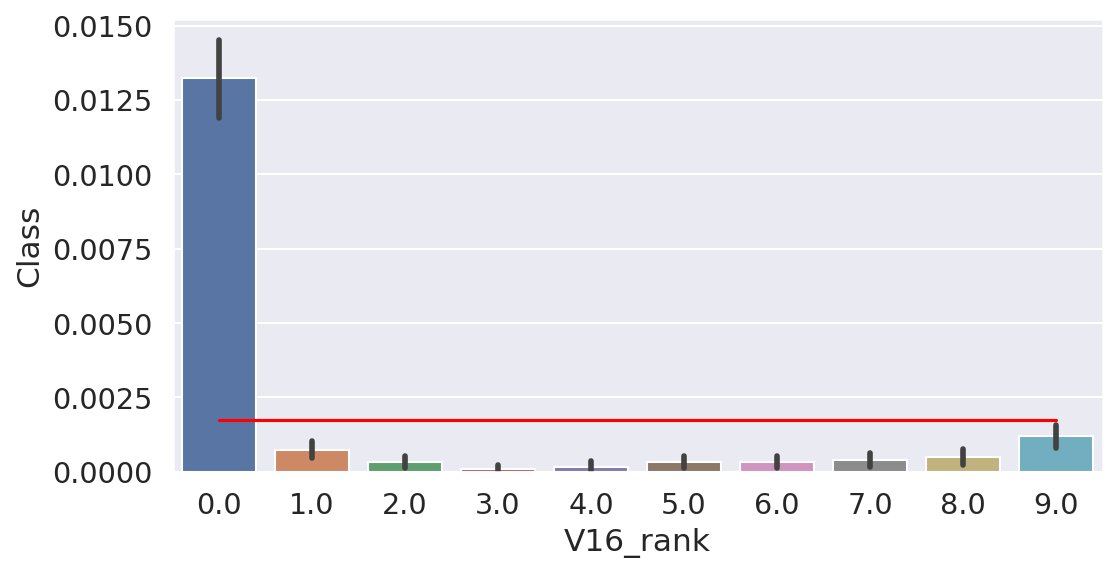

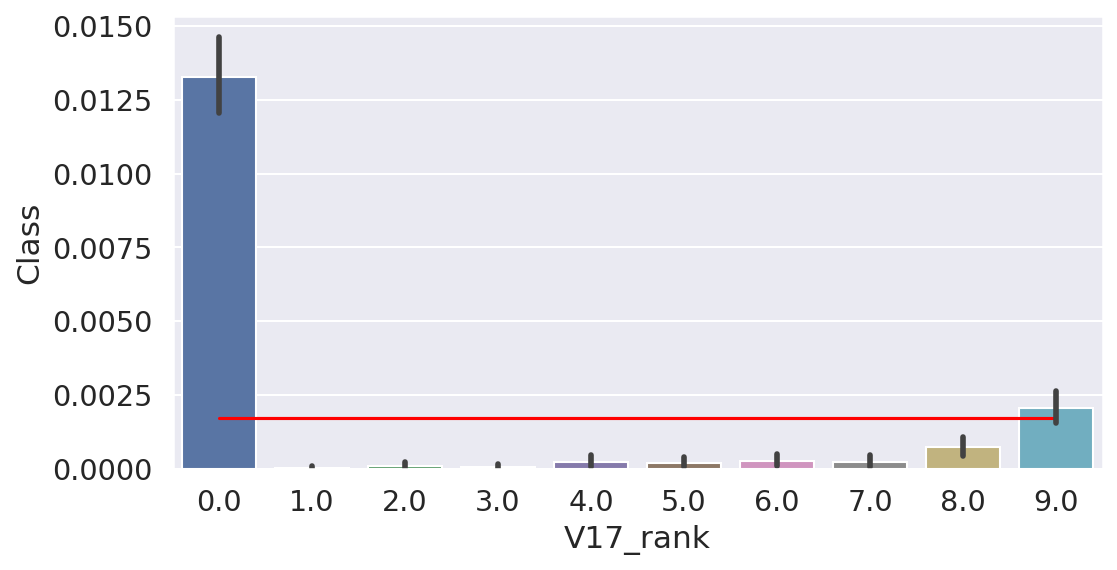

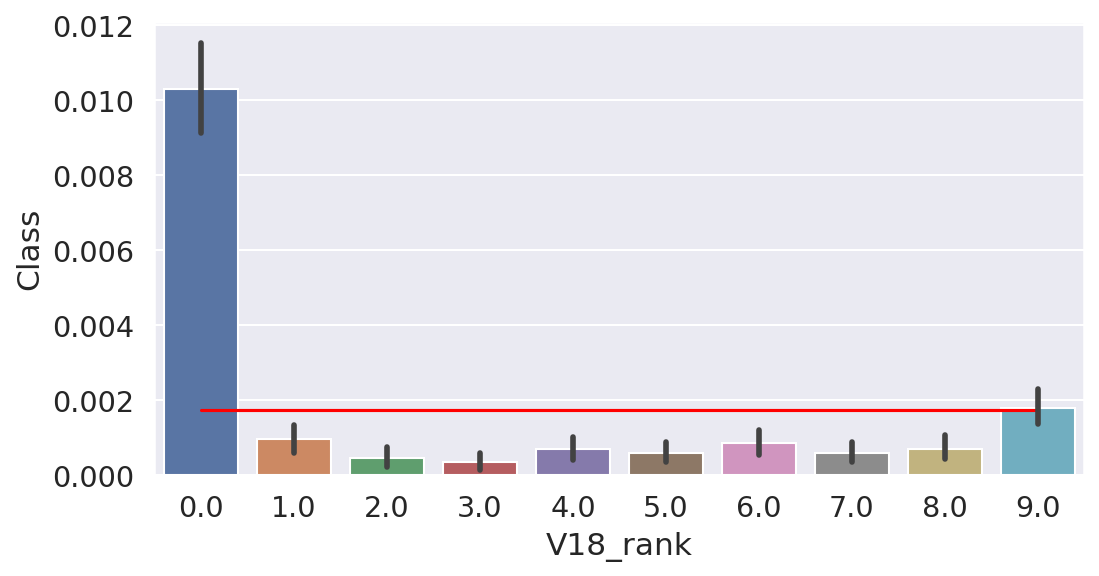

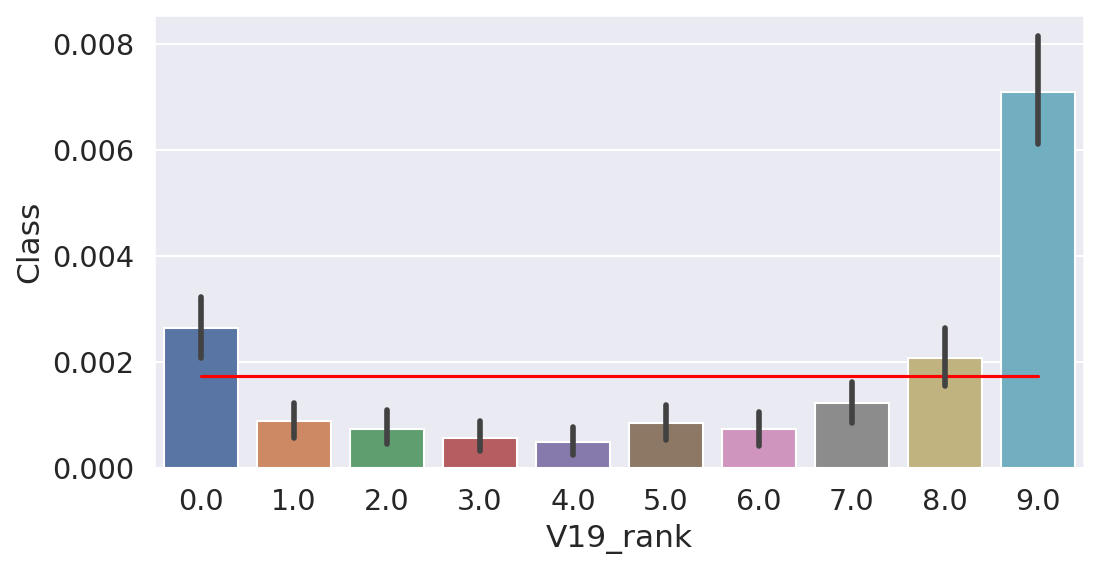

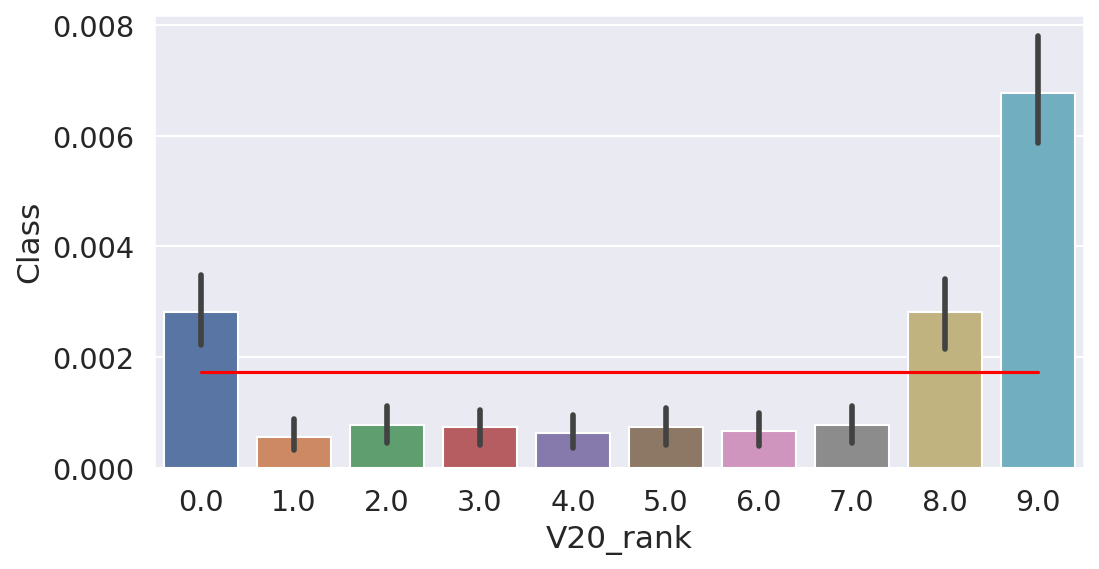

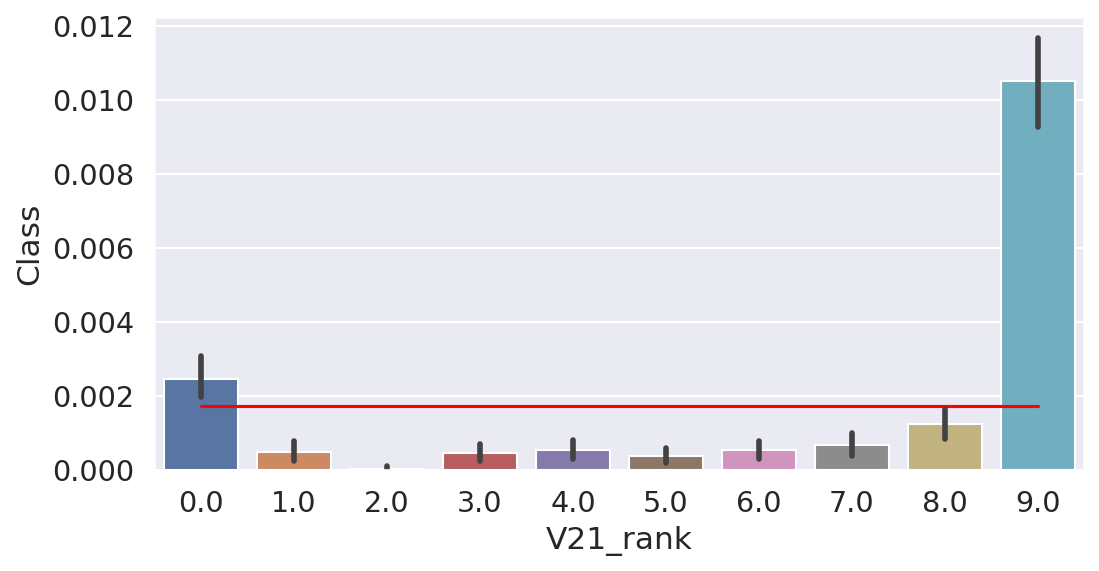

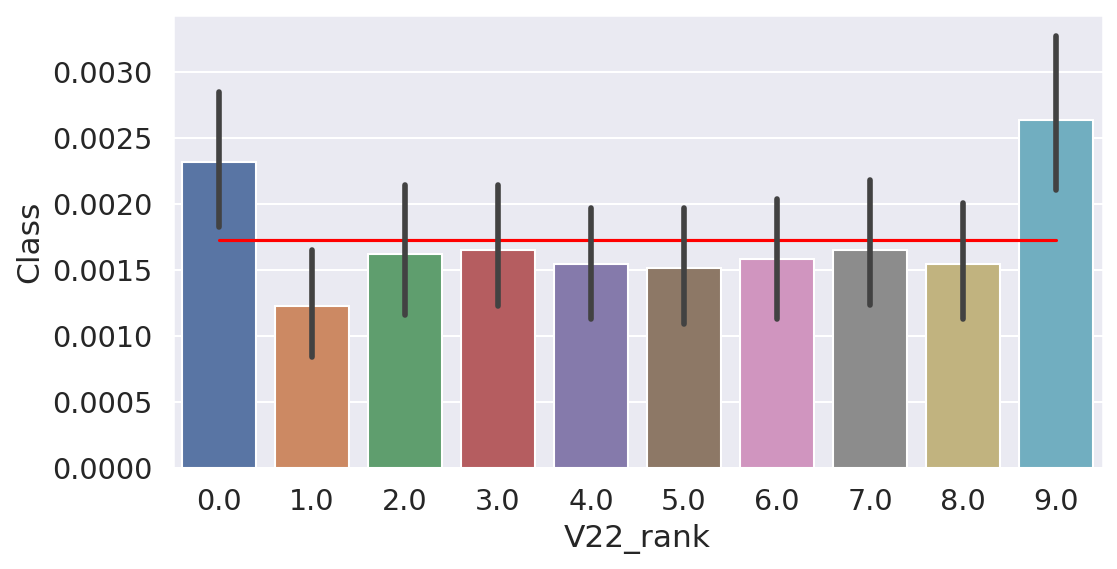

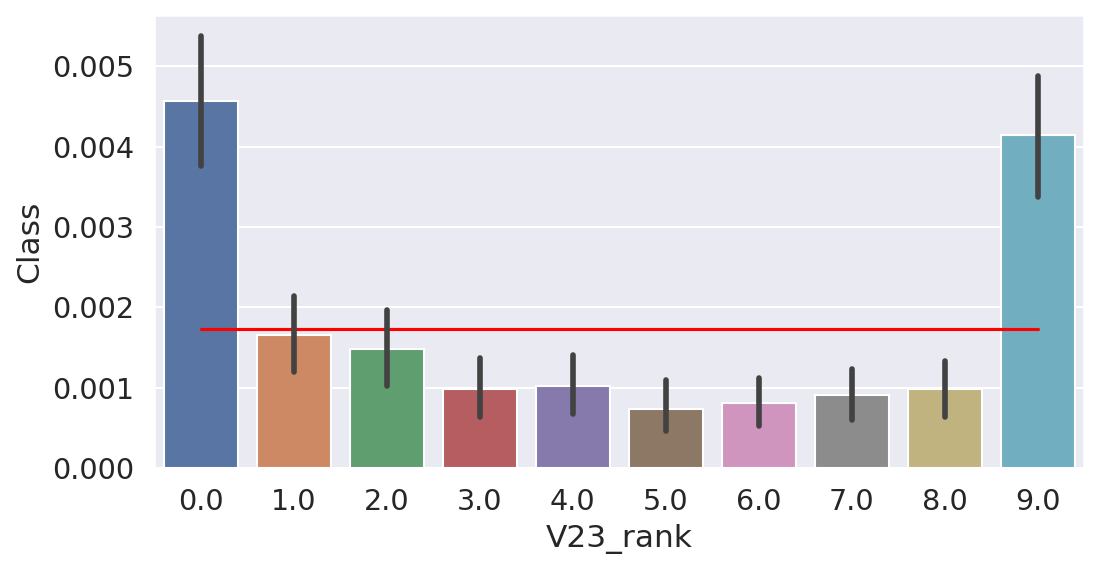

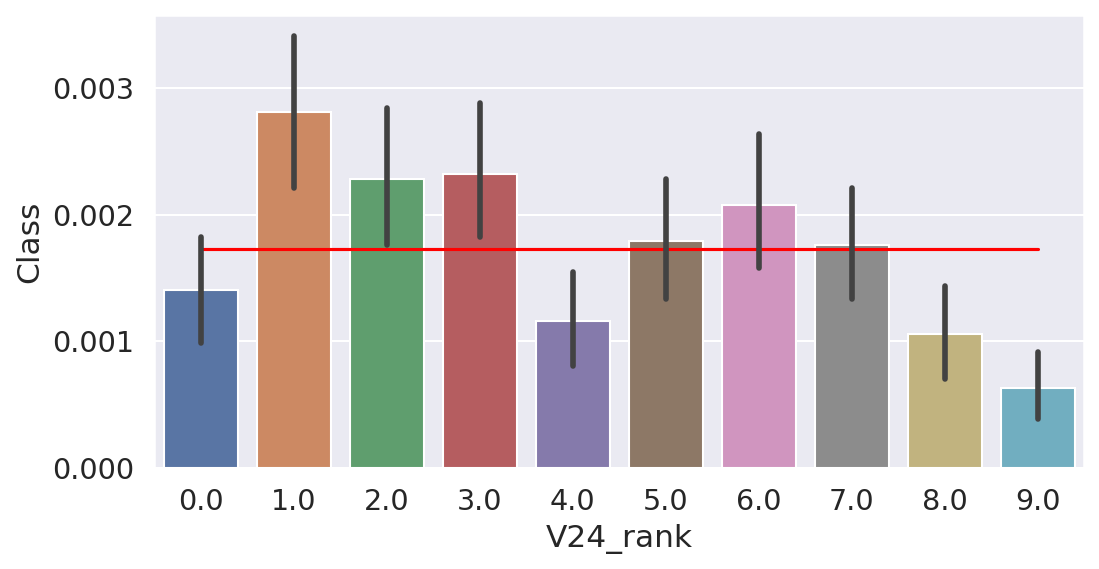

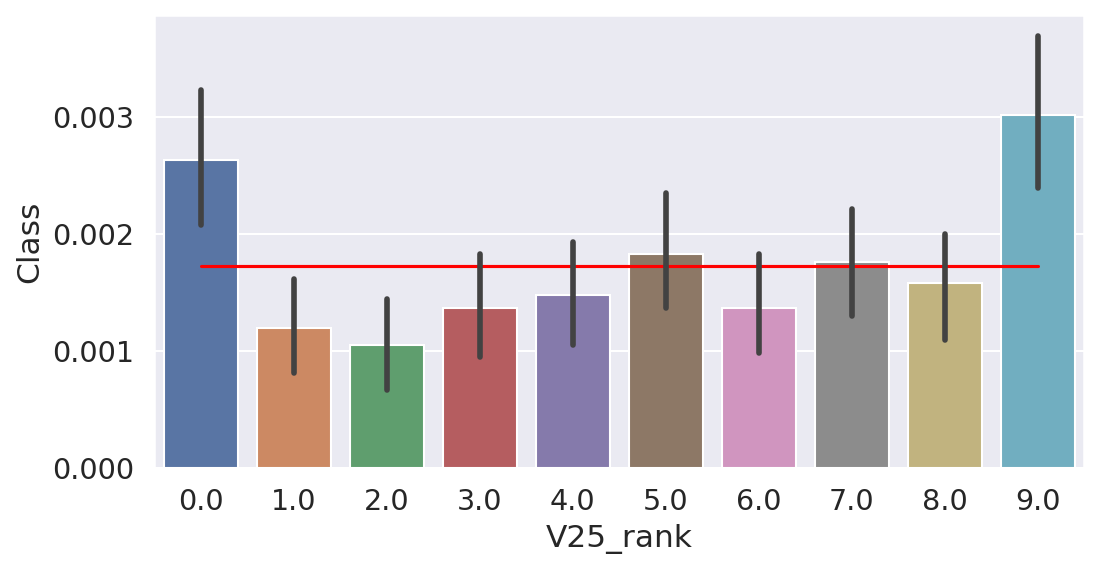

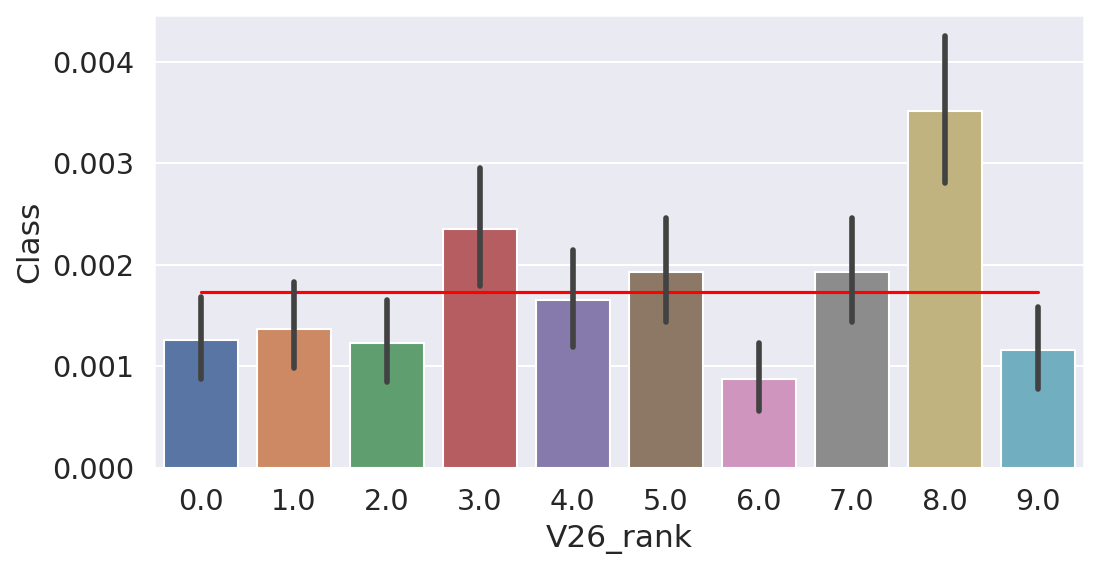

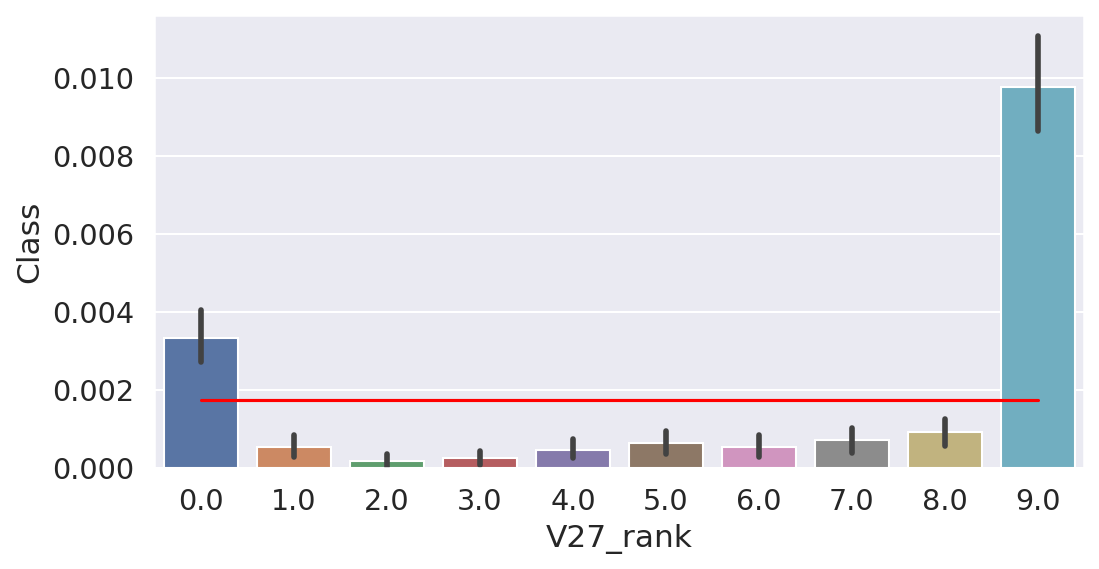

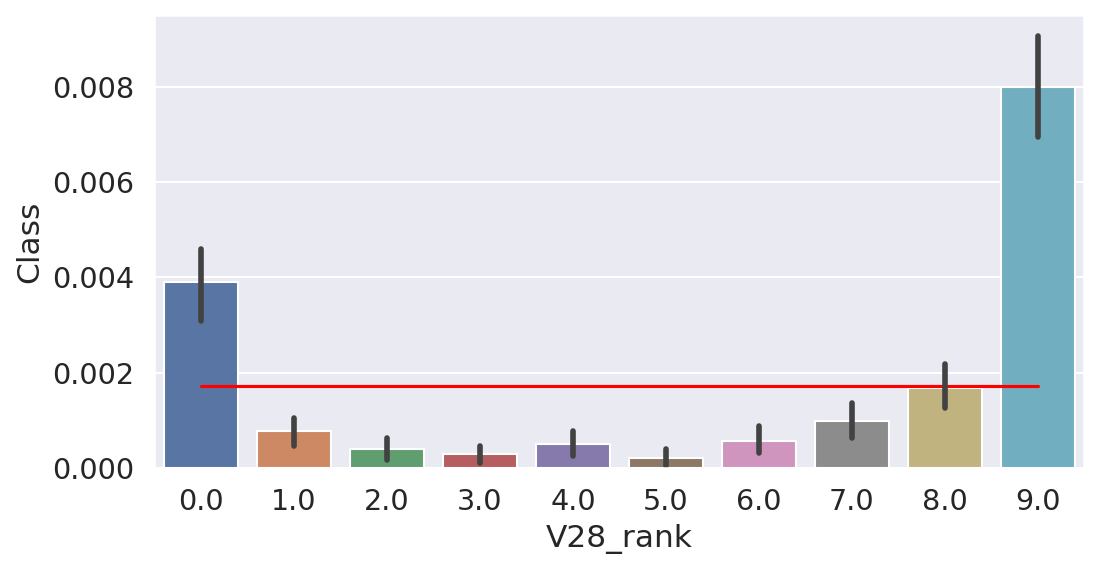

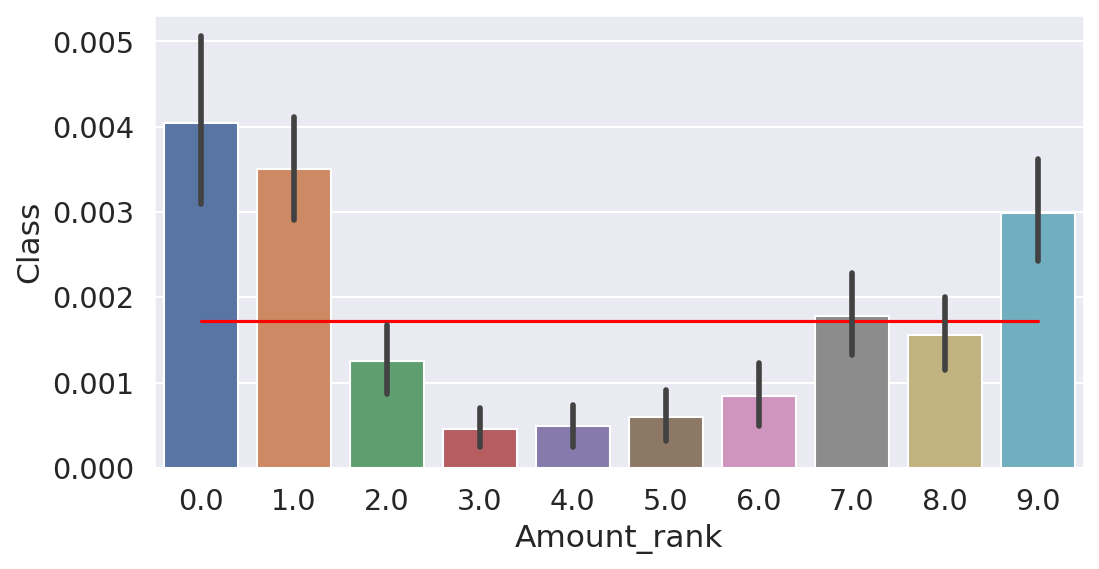

In [40]:
X_bin_combined = pd.concat([num_binned, df['Class']], axis=1, join='inner')
for col in num_binned.columns:
    plt.figure(figsize=(8,4), dpi=150)
    sns.lineplot(x=col, y=df['Class'].mean(), data=X_bin_combined, color='red')
    sns.barplot(x=col, y='Class', data=X_bin_combined, estimator=np.mean)
plt.show()

In [41]:
X = num
y = df['Class']

In [42]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from imblearn.over_sampling import SMOTE

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [44]:
X_train.shape

(213605, 29)

In [45]:
sm = SMOTE(random_state=101)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [47]:
X_train.shape

(426476, 29)

In [49]:
y_train.value_counts()

0    213238
1    213238
Name: Class, dtype: int64

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [51]:
model = DecisionTreeClassifier(random_state=101, )

In [55]:
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [4, 5, 6],
              'min_samples_split': [100, 150, 200],
              'min_samples_leaf': [75, 125, 175]}

In [56]:
random_search = RandomizedSearchCV(model, param_grid, scoring='accuracy', cv=10, n_jobs=-1)

In [57]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=101),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [4, 5, 6],
                                        'min_samples_leaf': [75, 125, 175],
                                        'min_samples_split': [100, 150, 200]},
                   scoring='accuracy')

In [58]:
random_search.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 175,
 'min_samples_split': 100,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 101,
 'splitter': 'best'}

In [59]:
from sklearn.metrics import classification_report, confusion_matrix, plot_roc_curve

In [60]:
dtree_predict = random_search.predict(X_test)

In [61]:
print(classification_report(y_test, dtree_predict))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     71077
           1       0.06      0.86      0.11       125

    accuracy                           0.97     71202
   macro avg       0.53      0.92      0.55     71202
weighted avg       1.00      0.97      0.99     71202



In [62]:
confusion_matrix(y_test, dtree_predict)

array([[69259,  1818],
       [   17,   108]])